In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import duckdb
from collections import defaultdict

sns.set_style("whitegrid")

In [2]:
# # Okabe-Ito color palette
# okabe_ito_colors = [
#     "#E69F00",  # orange
#     "#56B4E9",  # light blue
#     "#009E73",  # green
#     "#F0E442",  # yellow
#     "#0072B2",  # dark blue
#     "#D55E00",  # red
#     "#CC79A7",  # pink
#     "#000000",  # black
# ]

# # Use the palette in matplotlib
# plt.rcParams["axes.prop_cycle"] = plt.cycler(color=okabe_ito_colors)

# # Use the palette in seaborn
# sns.set_palette(okabe_ito_colors)

# # Use the palette in pandas
# pd.options.plotting.matplotlib.register_converters = False
# pd.plotting.register_matplotlib_converters()
# plt.rcParams["axes.prop_cycle"] = plt.cycler(color=okabe_ito_colors)

In [3]:
df = pd.read_csv("../bgc/antismash_results_final.tsv", sep="\t")
df_env = pd.read_csv("../env_corr/taxon_countries.tsv", sep="\t")
ptus = pd.read_csv(
    "../ptu_derep/derep_plasmids_clusters_with_ptu_ids.tsv",
    sep="\t",
    header=None,
    index_col=0,
)
ptus_mapping = {}

for ptu in ptus.index:
    for plasmid in ptus.loc[ptu][2].split(","):
        ptus_mapping[plasmid] = ptu

ptus_mapping
df["taxon_oid"] = df["Description"].apply(
    lambda x: x.split("|")[0] if "IMGPR" not in x else x.split("_")[2]
)

df["PTU"] = df["Description"].map(ptus_mapping)
df = df.join(df_env.set_index("taxon_oid"), on="taxon_oid")
df.head()

,BGC,Accession ID,Description,Product Prediction,BiG-SCAPE class,Organism,Taxonomy,bgc_length,kind,taxon_oid,...,silt (g/kg),soc (dg/kg),geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,363.0,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests
1,2162886015FOassembled-_contig00011.region001,2162886015FOassembled-_contig00011,2162886015|FOassembled-_contig00011,NRPS,NRPS,NaN,NaN,33726,single,2162886015,...,401.0,991.0,POINT (-0.37 51.8),547.0,English Lowlands Beech Forests,PA,PA4,Palearctic,4.0,Temperate Broadleaf and Mixed Forests
2,3300000519RepKanNP_Acetate_BrdU_F21BDRAFT_1000...,3300000519RepKanNP_Acetate_BrdU_F21BDRAFT_1000003,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,NRPS.NRP-metallophore,Others,NaN,NaN,28509,chemical_hybrid,3300000519,...,512.0,352.0,POINT (-96.61 39.1),756.0,Osage Plains/Flint Hills Prairie,NaN,NA8,Nearctic,8.0,"Temperate Grasslands, Savannas and Shrublands"
3,3300001979JGI24740J21852_10000024.region001,3300001979JGI24740J21852_10000024,3300001979|JGI24740J21852_10000024,lassopeptide,RiPPs,NaN,NaN,22423,single,3300001979,...,233.0,606.0,POINT (-85.37 42.39),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests
4,3300001979JGI24740J21852_10000367.region001,3300001979JGI24740J21852_10000367,3300001979|JGI24740J21852_10000367,hserlactone,Others,NaN,NaN,15928,single,3300001979,...,233.0,606.0,POINT (-85.37 42.39),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests


In [4]:
df_hosts = pd.read_csv(
    "../crispr_search/plasmid_host_taxonomy_consolidated_all_possible_hosts_final.tsv",
    sep="\t",
    index_col=0,
)

# separate host into different columns
taxonomies = ["domain", "phylum", "class", "order", "family", "genus", "species"]
for i, tax in enumerate(taxonomies):
    df_hosts[tax] = df_hosts["host"].apply(
        lambda x: x.split(";")[i] if len(x.split(";")) > i else np.nan
    )

df_hosts.head()

,PTU,host,method,domain,phylum,class,order,family,genus,species
Plasmid,,,,,,,,,,
3300056587|Ga0562382_00532,PTU-00000,d__Bacteria;p__Acidobacteriota;c__Terriglobia;...,iphop-blast,d__Bacteria,p__Acidobacteriota,c__Terriglobia,o__Terriglobales,f__SbA1,g__JAIQEY01,s__JAIQEY01 sp020073565
3300056587|Ga0562382_00532,PTU-00000,d__Bacteria;p__Acidobacteriota;c__Terriglobia;...,iphop-blast,d__Bacteria,p__Acidobacteriota,c__Terriglobia,o__Terriglobales,f__SbA1,g__PALSA-188,s__PALSA-188 sp003169715
3300056587|Ga0562382_00532,PTU-00000,d__Bacteria;p__Acidobacteriota;c__Terriglobia;...,iphop-blast,d__Bacteria,p__Acidobacteriota,c__Terriglobia,o__Terriglobales,f__SbA1,g__PALSA-188,NaN
3300056587|Ga0562382_00532,PTU-00000,d__Bacteria;p__Acidobacteriota;c__Terriglobia;...,iphop-blast,d__Bacteria,p__Acidobacteriota,c__Terriglobia,o__Terriglobales,f__SbA1,g__Bog-209,s__Bog-209 sp003132405
3300041809|Ga0455670_0001447,PTU-00000,d__Bacteria;p__Acidobacteriota;c__Terriglobia;...,iphop-blast,d__Bacteria,p__Acidobacteriota,c__Terriglobia,o__Terriglobales,f__SbA1,g__Sulfotelmatobacter,s__Sulfotelmatobacter sp003134655


In [5]:
df = df.join(df_hosts["order"], on="Description")

df.head()

,BGC,Accession ID,Description,Product Prediction,BiG-SCAPE class,Organism,Taxonomy,bgc_length,kind,taxon_oid,...,soc (dg/kg),geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM,order
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales


Calculate odds-ratio between Isolate and Meta BGCs per BGC class

In [6]:
df_for_odds = df.drop_duplicates(subset=["BGC", "Description", "Origin"])

In [7]:
from scipy import stats


def calc_odds_ratio(bgc_class):
    num_ele_meta = df_for_odds[
        (df_for_odds["Origin"] == "Meta")
        & (df_for_odds["BiG-SCAPE class"] == bgc_class)
    ].shape[0]
    num_ele_isolate = df_for_odds[
        (df_for_odds["Origin"] == "Isolate")
        & (df_for_odds["BiG-SCAPE class"] == bgc_class)
    ].shape[0]
    other_class_meta = df_for_odds[
        (df_for_odds["Origin"] == "Meta")
        & (df_for_odds["BiG-SCAPE class"] != bgc_class)
    ].shape[0]
    other_class_isolate = df_for_odds[
        (df_for_odds["Origin"] == "Isolate")
        & (df_for_odds["BiG-SCAPE class"] != bgc_class)
    ].shape[0]
    table = np.array(
        [[num_ele_meta, num_ele_isolate], [other_class_meta, other_class_isolate]]
    )

    fisher_exact_p = stats.fisher_exact(table).pvalue
    res = stats.contingency.odds_ratio(table)

    return (np.log(res.statistic), fisher_exact_p)

In [9]:
pvals = []
ods_dict = {}
for bgc_class in df_for_odds["BiG-SCAPE class"].unique():
    if bgc_class == "Saccharides":
        continue
    statistic, p = calc_odds_ratio(bgc_class)
    pvals.append(p)
    ods_dict[bgc_class] = statistic
    print(f"log_odds ratio for {bgc_class}", statistic, p)
print(
    f"adjusted ps: {dict(zip(ods_dict.keys(), stats.false_discovery_control(pvals)))}"
)

log_odds ratio for RiPPs 0.2473367151311802 0.00012293940171398084
log_odds ratio for NRPS -0.4275364706448724 3.060246867422986e-05
log_odds ratio for Others 0.18522538088906193 0.002132154862035089
log_odds ratio for Terpene -0.8138859623383167 3.553224376297755e-08
log_odds ratio for PKSI -1.0015801872051795 5.5416342175642935e-05
log_odds ratio for PKS-NRP_Hybrids -0.7992757125823551 0.0002895212856184326
log_odds ratio for PKSother 0.13529337334911237 0.5821030593734263
adjusted ps: {'RiPPs': 0.00021514395299946647, 'NRPS': 0.00010710864035980451, 'Others': 0.002487514005707604, 'Terpene': 2.4872570634084285e-07, 'PKSI': 0.00012930479840983353, 'PKS-NRP_Hybrids': 0.0004053297998658056, 'PKSother': 0.5821030593734263}


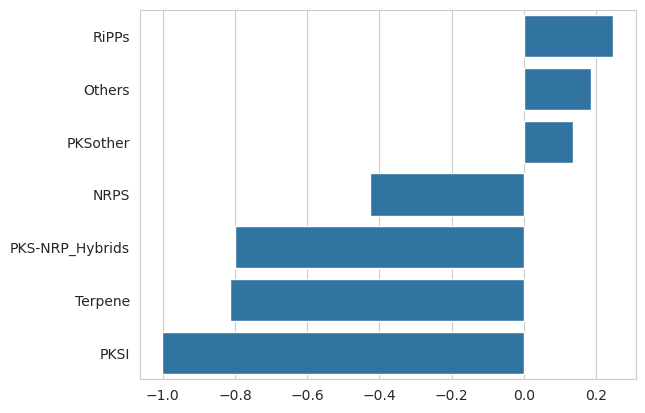

In [9]:
sorted_items = sorted(ods_dict.items(), key=lambda x: x[1], reverse=True)
sorted_keys, sorted_values = zip(*sorted_items)
sns.barplot(y=sorted_keys, x=sorted_values)
plt.savefig("../figures/bgc/bgc_odds_ratio.pdf", bbox_inches="tight")

In [10]:
df["PTU"].nunique()

2723

In [11]:
df.drop_duplicates(subset=["PTU", "Origin"])["Origin"].value_counts()

Origin
Meta       1612
Isolate    1154
Name: count, dtype: int64

In [12]:
ptus.index

Index(['PTU-00000', 'PTU-00001', 'PTU-00002', 'PTU-00003', 'PTU-00004',
       'PTU-00005', 'PTU-00006', 'PTU-00007', 'PTU-00008', 'PTU-00009',
       ...
       'PTU-57255', 'PTU-57256', 'PTU-57257', 'PTU-57258', 'PTU-57259',
       'PTU-57260', 'PTU-57261', 'PTU-57262', 'PTU-57263', 'PTU-57264'],
      dtype='object', name=0, length=57265)

In [13]:
bgc_class_mapping = defaultdict(list)

# Create a set for faster lookup
ptu_set = set(ptus.index)

# Group the dataframe by 'BiG-SCAPE class'
grouped = df.groupby("BiG-SCAPE class")["PTU"]

# Iterate over the unique classes
for bgc_class in df["BiG-SCAPE class"].unique():
    # Get the PTUs for the current class
    bgc_ptus = set(grouped.get_group(bgc_class))
    # Create the mapping
    for ptu in ptus.index:
        bgc_class_mapping[bgc_class].append(1 if ptu in bgc_ptus else 0)

In [14]:
from scipy import stats

stats.kruskal(*bgc_class_mapping.values())

KruskalResult(statistic=4940.235685503568, pvalue=0.0)

In [15]:
bgc_class_mapping.keys()

dict_keys(['RiPPs', 'NRPS', 'Others', 'Terpene', 'PKSI', 'PKS-NRP_Hybrids', 'PKSother', 'Saccharides'])

In [16]:
from scikit_posthocs import posthoc_dunn

dunn_test = posthoc_dunn(
    [
        bgc_class_mapping["RiPPs"],
        bgc_class_mapping["NRPS"],
        bgc_class_mapping["Others"],
        bgc_class_mapping["Terpene"],
        bgc_class_mapping["PKSI"],
        bgc_class_mapping["PKS-NRP_Hybrids"],
        bgc_class_mapping["PKSother"],
        bgc_class_mapping["Saccharides"],
    ],
    p_adjust="holm",
)
dunn_test.index = [
    "RiPPs",
    "NRPS",
    "Others",
    "Terpene",
    "PKSI",
    "PKS-NRP_Hybrids",
    "PKSother",
    "Saccharides",
]
dunn_test.columns = [
    "RiPPs",
    "NRPS",
    "Others",
    "Terpene",
    "PKSI",
    "PKS-NRP_Hybrids",
    "PKSother",
    "Saccharides",
]
dunn_test[dunn_test < 0.05]

,RiPPs,NRPS,Others,Terpene,PKSI,PKS-NRP_Hybrids,PKSother,Saccharides
RiPPs,NaN,2.541131e-156,8.650074e-24,2.458294e-245,1.831675e-285,1.632691e-272,6.244836e-281,0.000000e+00
NRPS,2.541131e-156,NaN,2.520303e-299,1.193732e-10,4.871848e-20,8.653790e-17,6.967427e-19,6.010450e-29
Others,8.650074e-24,2.520303e-299,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Terpene,2.458294e-245,1.193732e-10,0.000000e+00,NaN,NaN,NaN,NaN,3.938575e-05
PKSI,1.831675e-285,4.871848e-20,0.000000e+00,NaN,NaN,NaN,NaN,NaN
PKS-NRP_Hybrids,1.632691e-272,8.653790e-17,0.000000e+00,NaN,NaN,NaN,NaN,4.630290e-02
PKSother,6.244836e-281,6.967427e-19,0.000000e+00,NaN,NaN,NaN,NaN,NaN
Saccharides,0.000000e+00,6.010450e-29,0.000000e+00,3.938575e-05,NaN,4.630290e-02,NaN,NaN


In [26]:
# number of BGCs per environment, normalized by total number of plasmids in environment
import duckdb

with duckdb.connect("../soil_plasmid.db") as con:
    plasmid_per_env = con.execute(
        'SELECT SUM("Plasmid Count") AS num_plasmids, "Ecosystem Subtype Custom" FROM taxon_metadata GROUP BY "Ecosystem Subtype Custom"'
    ).df()
plasmid_per_env.set_index("Ecosystem Subtype Custom", inplace=True)

In [42]:
df[df["BiG-SCAPE class"].isin(["RiPPs", "Others", "PKSother"])].drop_duplicates(
    "Description"
)["Origin"].value_counts()

Origin
Meta       1978
Isolate    1276
Name: count, dtype: int64

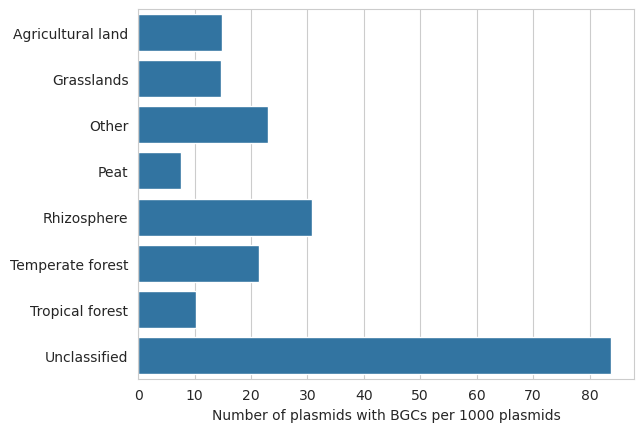

In [44]:
bgc_per_env = (
    df[df["BiG-SCAPE class"].isin(["RiPPs", "Others", "PKSother"])]
    .drop_duplicates("Description")
    .groupby("Ecosystem Subtype Custom")["BGC"]
    .count()
    / plasmid_per_env["num_plasmids"]
) * 1000

sns.barplot(x=bgc_per_env, y=bgc_per_env.index)
plt.xlabel("Number of plasmids with BGCs per 1000 plasmids")
plt.ylabel("");

In [33]:
df.drop_duplicates("Description").groupby("Ecosystem Subtype Custom")[
    "BGC"
].count().sum()

3813

In [31]:
df.head()

,BGC,Accession ID,Description,Product Prediction,BiG-SCAPE class,Organism,Taxonomy,bgc_length,kind,taxon_oid,...,soc (dg/kg),geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM,order
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales


In [22]:
plasmid_per_env["num_plasmids"]

0    17034.0
1    16981.0
2    10602.0
3     7846.0
4     1859.0
5     6308.0
6    28398.0
7    18463.0
Name: num_plasmids, dtype: float64

In [18]:
df.head()

,BGC,Accession ID,Description,Product Prediction,BiG-SCAPE class,Organism,Taxonomy,bgc_length,kind,taxon_oid,...,soc (dg/kg),geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM,order
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales
0,2162886007SwRhRL2b_contig_1567849.region001,2162886007SwRhRL2b_contig_1567849,2162886007|SwRhRL2b_contig_1567849,lassopeptide,RiPPs,NaN,NaN,22261,single,2162886007,...,902.0,POINT (-84.39 42.79),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Enterobacterales


<Axes: ylabel='Ecosystem Subtype Custom'>

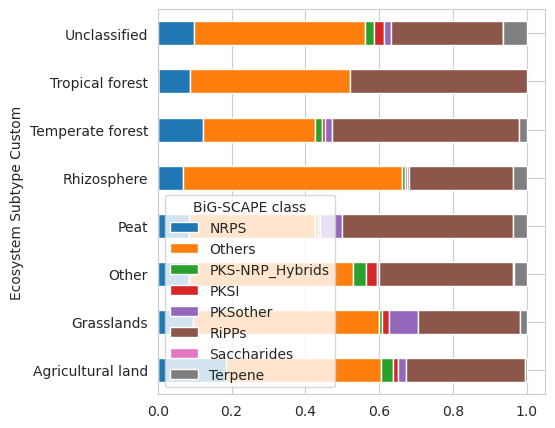

In [18]:
a = (
    df.drop_duplicates(subset=["BGC"])
    .groupby(["Ecosystem Subtype Custom", "BiG-SCAPE class"])
    .size()
    .unstack()
    .fillna(0)
)
a.div(a.sum(axis=1), axis=0).plot(kind="barh", stacked=True, figsize=(5, 5))
# plt.savefig("../figures/bgc/bgc_prop_per_ecosystem.pdf", bbox_inches="tight")

In [19]:
a.sum(axis=1)

Ecosystem Subtype Custom
Agricultural land     226.0
Grasslands            115.0
Other                 234.0
Peat                  164.0
Rhizosphere          1040.0
Temperate forest      446.0
Tropical forest        23.0
Unclassified         2190.0
dtype: float64

In [20]:
test_h = df.drop_duplicates(subset=["BGC", "order"])

# test_h.set_index("BGC", inplace=True)

test_h["new_o__"] = test_h["order"].apply(
    lambda x: (
        "Other"
        if pd.isna(x)
        else x
        if test_h["order"].value_counts()[x] >= 128
        else "Other"
    )
)

/tmp/ipykernel_418680/582326824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_h["new_o__"] = test_h["order"].apply(


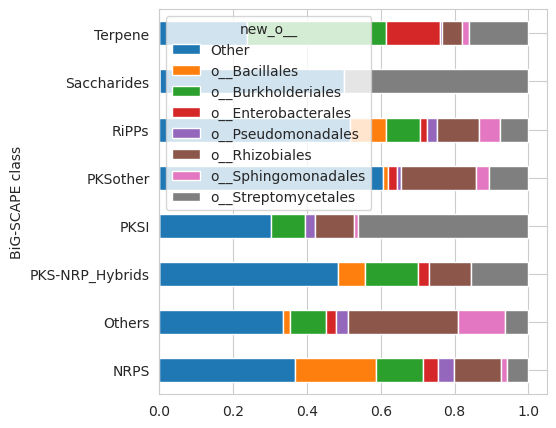

In [21]:
a = (
    test_h.drop_duplicates(subset=["BGC", "order"])
    .groupby(["BiG-SCAPE class", "new_o__"])
    .size()
    .unstack()
    .fillna(0)
)
a.div(a.sum(axis=1), axis=0).plot(kind="barh", stacked=True, figsize=(5, 5))
plt.savefig("../figures/bgc/bgc_prop_per_host.pdf", bbox_inches="tight")

---
Most prevalent products

In [22]:
df.drop_duplicates("BGC")["Product Prediction"].value_counts()

Product Prediction
hserlactone                              963
RiPP-like                                404
lassopeptide                             261
NRPS                                     248
hydrogen-cyanide                         230
                                        ... 
NRPS-like.T3PKS                            1
RiPP-like.RRE-containing.lassopeptide      1
T1PKS.PKS-like                             1
NRPS.butyrolactone                         1
transAT-PKS.T3PKS                          1
Name: count, Length: 236, dtype: int64

In [33]:
df["product_fixed"] = df.drop_duplicates("BGC")["Product Prediction"].apply(
    lambda x: x
    if x == "amglyccycl"
    else x
    if df.drop_duplicates("BGC")["Product Prediction"].value_counts()[x] >= 40
    else "Other"
)

In [34]:
a = (
    df.drop_duplicates(subset=["BGC", "PTU", "Origin"])
    .groupby("Origin")["product_fixed"]
    .value_counts()
    .unstack()
    .T.fillna(0)
)
a["Total"] = a.sum(axis=1)
a = a.sort_values("Total", ascending=False).drop("Total", axis=1)
a["Class"] = (
    df.drop_duplicates(subset=["BGC", "PTU", "Origin"])
    .groupby("product_fixed")["BiG-SCAPE class"]
    .value_counts()
    .unstack()
    .idxmax(axis=1)
)

a["joined"] = a.index + " (" + a["Class"] + ")"
a.reset_index(drop=True, inplace=True)
a.set_index("joined", inplace=True)
a.head()

Origin,Isolate,Meta,Class
joined,,,
hserlactone (Others),305,655,Others
Other (Others),509,356,Others
RiPP-like (RiPPs),189,213,RiPPs
lassopeptide (RiPPs),47,214,RiPPs
NRPS (NRPS),152,94,NRPS


In [35]:
# a.drop('Class',axis=1).T.plot(kind='pie', autopct='%1.1f%%',subplots=True, figsize=(50, 20))
# plt.savefig("../figures/bgc/bgc_products_pie.pdf", bbox_inches="tight")

In [36]:
a["Total"] = a.drop("Class", axis=1).sum(axis=1)
a = a.sort_values(["Class", "Total"], ascending=False).drop("Total", axis=1)

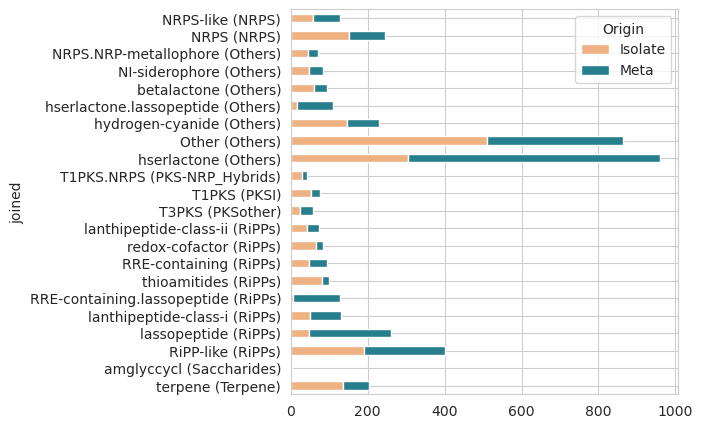

In [37]:
a.plot(kind="barh", stacked=True, figsize=(5, 5), color=["#EEB182", "#277F8E"])
plt.savefig("../figures/bgc/bgc_products.pdf", bbox_inches="tight")

Too little saccharides, so we are ignoring them from the figure

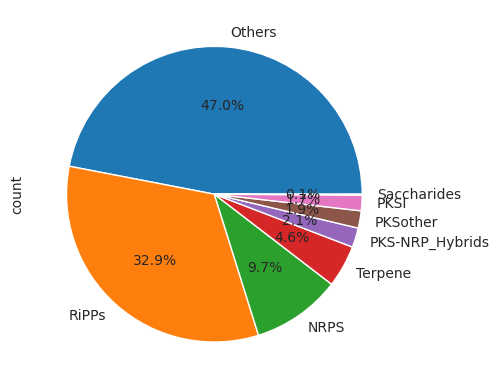

In [24]:
df.drop_duplicates("BGC")["BiG-SCAPE class"].value_counts().plot(
    kind="pie", autopct="%1.1f%%"
)
plt.savefig("../figures/bgc/bgc_classes.pdf", bbox_inches="tight")

Plasmids with hits to the QS PFAM

In [48]:
# with open("quorum_sensing_plasmids_with_bgc.txt") as f:
#     qs_plasmids = f.read().splitlines()

In [49]:
df_dedup = df.drop_duplicates(subset=["BGC"])
# df_dedup[df_dedup["Description"].isin(qs_plasmids)].groupby("Origin")[
#     "Product Prediction"
# ].value_counts().unstack().T.fillna(0)

Siderophore

In [50]:
df_dedup[df_dedup["Product Prediction"].str.contains("siderophore")]

,BGC,Accession ID,Description,Product Prediction,BiG-SCAPE class,Organism,Taxonomy,bgc_length,kind,taxon_oid,...,geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM,order,product_fixed
8,3300001990JGI24737J22298_10000278.region001,3300001990JGI24737J22298_10000278,3300001990|JGI24737J22298_10000278,NI-siderophore.hserlactone,Others,NaN,NaN,10207,single,3300001990,...,POINT (-85.37 42.39),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Sphingomonadales,Other
9,3300002067JGI24735J21928_10000237.region001,3300002067JGI24735J21928_10000237,3300002067|JGI24735J21928_10000237,NI-siderophore.hserlactone,Others,NaN,NaN,11160,single,3300002067,...,POINT (-85.37 42.39),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Sphingomonadales,Other
26,3300003320rootH2_10000637.region001,3300003320rootH2_10000637,3300003320|rootH2_10000637,NI-siderophore,Others,NaN,NaN,16602,single,3300003320,...,POINT (147.18 -19.73),784.0,Brigalow Tropical Savanna,AA,AA7,Australasia,7.0,"Tropical and Subtropical Grasslands, Savannas ...",NaN,NI-siderophore
107,3300005539Ga0068853_100013042.region001,3300005539Ga0068853_100013042,3300005539|Ga0068853_100013042,NI-siderophore,Others,NaN,NaN,6777,single,3300005539,...,POINT (-85.37 42.39),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Sphingomonadales,NI-siderophore
137,3300005616Ga0068852_100001043.region001,3300005616Ga0068852_100001043,3300005616|Ga0068852_100001043,NI-siderophore.hserlactone,Others,NaN,NaN,10597,single,3300005616,...,POINT (-85.37 42.39),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests,o__Sphingomonadales,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,PLSDB_NZ_CP119567.1.region001,PLSDB_NZ_CP119567.1,PLSDB_NZ_CP119567.1,NI-siderophore,Others,NaN,NaN,31502,single,PLSDB_NZ_CP119567.1,...,POINT (94.93 31),647.0,Southeast Tibet Shrublands And Meadows,PA,PA10,Palearctic,10.0,Montane Grasslands and Shrublands,NaN,NI-siderophore
4248,Refsoil_NC_006625.1.region001,Refsoil_NC_006625.1,Refsoil_NC_006625.1,NI-siderophore,Others,NaN,NaN,24910,single,Refsoil_NC_006625.1,...,POINT EMPTY,NaN,Unknown,NaN,NaN,Unknown,NaN,Unknown,o__Enterobacterales,NI-siderophore
4322,Refsoil_NC_014120.1.region001,Refsoil_NC_014120.1,Refsoil_NC_014120.1,NI-siderophore.NRPS,Others,NaN,NaN,46513,single,Refsoil_NC_014120.1,...,POINT (104.95 21.6),228.0,Red River Freshwater Swamp Forests,IM,IM1,Indo-Malay,1.0,Tropical and Subtropical Moist Broadleaf Forests,NaN,Other
4344,Refsoil_NC_015597.1.region002,Refsoil_NC_015597.1,Refsoil_NC_015597.1,NI-siderophore,Others,NaN,NaN,29890,single,Refsoil_NC_015597.1,...,POINT EMPTY,NaN,Unknown,NaN,NaN,Unknown,NaN,Unknown,o__Rhizobiales,NI-siderophore


In [ ]:
non_siderophore = (
    df_dedup[~df_dedup["Product Prediction"].str.contains("siderophore")]["order"]
    .fillna("Unknown")
    .value_counts()
)

In [66]:
contingency = pd.DataFrame.from_dict(
    df_dedup[df_dedup["Product Prediction"].str.contains("siderophore")]["order"]
    .fillna("Unknown")
    .value_counts()
    .to_dict(),
    orient="index",
).join(
    pd.DataFrame.from_dict(
        non_siderophore[
            non_siderophore.index.isin(
                df_dedup[df_dedup["Product Prediction"].str.contains("siderophore")][
                    "order"
                ]
                .fillna("Unknown")
                .value_counts()
                .index
            )
        ].to_dict(),
        orient="index",
    ),
    rsuffix="non-siderophore",
)
contingency.columns = ["siderophore", "non-siderophore"]

In [67]:
contingency

,siderophore,non-siderophore
Unknown,22,1027
o__Rhizobiales,22,879
o__Sphingomonadales,17,351
o__Enterobacterales,17,122
o__Burkholderiales,7,490
o__Pseudomonadales,6,121
o__Streptomycetales,5,356
o__Terriglobales,1,86
o__Mycobacteriales,1,104


In [68]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(contingency[["siderophore", "non-siderophore"]])

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 64.50174432234964
P-value: 6.054557970223856e-11
Degrees of Freedom: 8


In [69]:
observed = contingency[["siderophore", "non-siderophore"]].values
residuals = (observed - ex) / np.sqrt(ex)

# Add standardized residuals to the DataFrame
contingency["Standardized Residuals (Siderophore)"] = residuals[:, 0]
contingency["Standardized Residuals (Non-Siderophore)"] = residuals[:, 1]

# Output the DataFrame
contingency


,siderophore,non-siderophore,Standardized Residuals (Siderophore),Standardized Residuals (Non-Siderophore)
Unknown,22,1027,-1.182412,0.196846
o__Rhizobiales,22,879,-0.466142,0.077602
o__Sphingomonadales,17,351,2.246158,-0.373936
o__Enterobacterales,17,122,6.844433,-1.139448
o__Burkholderiales,7,490,-1.748942,0.291160
o__Pseudomonadales,6,121,1.391476,-0.231650
o__Streptomycetales,5,356,-1.517649,0.252655
o__Terriglobales,1,86,-0.878863,0.146311
o__Mycobacteriales,1,104,-1.088462,0.181205


Lanthipeptides

In [16]:
df[df["Product Prediction"].str.contains("lanthipeptide")]

,BGC,Accession ID,Description,Product Prediction,BiG-SCAPE class,Organism,Taxonomy,bgc_length,kind,taxon_oid,...,soc (dg/kg),PTU Count,geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM
25,3300003320rootH2_10000153.region001,3300003320rootH2_10000153,3300003320|rootH2_10000153,lanthipeptide-class-i,RiPPs,NaN,NaN,25490,single,3300003320,...,165.0,120.0,POINT (147.18 -19.73),784.0,Brigalow Tropical Savanna,AA,AA7,Australasia,7.0,"Tropical and Subtropical Grasslands, Savannas ..."
37,3300003323rootH1_10018306.region001,3300003323rootH1_10018306,3300003323|rootH1_10018306,lanthipeptide-class-i,RiPPs,NaN,NaN,20841,single,3300003323,...,165.0,102.0,POINT (147.18 -19.73),784.0,Brigalow Tropical Savanna,AA,AA7,Australasia,7.0,"Tropical and Subtropical Grasslands, Savannas ..."
59,3300005338Ga0068868_100000014.region002,3300005338Ga0068868_100000014,3300005338|Ga0068868_100000014,hserlactone.lanthipeptide-class-ii,Others,NaN,NaN,21270,single,3300005338,...,606.0,19.0,POINT (-85.37 42.39),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests
83,3300005524Ga0070737_10000163.region001,3300005524Ga0070737_10000163,3300005524|Ga0070737_10000163,lanthipeptide-class-i,RiPPs,NaN,NaN,24679,single,3300005524,...,1558.0,67.0,POINT (-76.34 40.8),704.0,Central Appalachian Forest,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests
153,3300005844Ga0068862_100000181.region001,3300005844Ga0068862_100000181,3300005844|Ga0068862_100000181,lanthipeptide-class-i,RiPPs,NaN,NaN,25151,single,3300005844,...,606.0,51.0,POINT (-85.37 42.39),182.0,North Central Tillplain,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,Refsoil_NC_018499.1.region001,Refsoil_NC_018499.1,Refsoil_NC_018499.1,lanthipeptide-class-ii,RiPPs,NaN,NaN,31883,single,Refsoil_NC_018499.1,...,NaN,1.0,POINT EMPTY,NaN,Unknown,NaN,NaN,Unknown,NaN,Unknown
4372,Refsoil_NC_018510.1.region002,Refsoil_NC_018510.1,Refsoil_NC_018510.1,lanthipeptide-class-iii,RiPPs,NaN,NaN,22604,single,Refsoil_NC_018510.1,...,NaN,1.0,POINT EMPTY,NaN,Unknown,NaN,NaN,Unknown,NaN,Unknown
4397,Refsoil_NC_020394.1.region001,Refsoil_NC_020394.1,Refsoil_NC_020394.1,T1PKS.NRPS.lanthipeptide-class-ii,Others,NaN,NaN,91433,chemical_hybrid,Refsoil_NC_020394.1,...,NaN,1.0,POINT EMPTY,NaN,Unknown,NaN,NaN,Unknown,NaN,Unknown
4398,Refsoil_NC_020394.1.region002,Refsoil_NC_020394.1,Refsoil_NC_020394.1,lanthipeptide-class-i,RiPPs,NaN,NaN,24394,single,Refsoil_NC_020394.1,...,NaN,1.0,POINT EMPTY,NaN,Unknown,NaN,NaN,Unknown,NaN,Unknown


In [70]:
non_lanthi = (
    df_dedup[~df_dedup["Product Prediction"].str.contains("lanthipeptide")]["order"]
    .fillna("Unknown")
    .value_counts()
)


In [73]:
contingency = pd.DataFrame.from_dict(
    df_dedup[df_dedup["Product Prediction"].str.contains("lanthipeptide")]["order"]
    .fillna("Unknown")
    .value_counts()
    .to_dict(),
    orient="index",
).join(
    pd.DataFrame.from_dict(
        non_lanthi[
            non_lanthi.index.isin(
                df_dedup[df_dedup["Product Prediction"].str.contains("lanthipeptide")][
                    "order"
                ]
                .fillna("Unknown")
                .value_counts()
                .index
            )
        ].to_dict(),
        orient="index",
    ),
    rsuffix="non-lanthipeptide",
)
contingency.columns = ["lanthipeptide", "non-lanthipeptide"]
contingency = contingency.fillna(0)

In [74]:
contingency

,lanthipeptide,non-lanthipeptide
o__Bacillales,65,219.0
o__Streptomycetales,64,297.0
Unknown,60,989.0
o__Mycobacteriales,22,83.0
o__Streptosporangiales,16,23.0
o__Cyanobacteriales,5,24.0
o__Rhizobiales,5,896.0
o__Actinomycetales,5,12.0
o__Terriglobales,4,83.0
o__Clostridiales,2,5.0


In [75]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(contingency[["lanthipeptide", "non-lanthipeptide"]])

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 532.3181607605701
P-value: 1.3085665182711898e-98
Degrees of Freedom: 22


In [76]:
observed = contingency[["lanthipeptide", "non-lanthipeptide"]].values
residuals = (observed - ex) / np.sqrt(ex)

# Add standardized residuals to the DataFrame
contingency["Standardized Residuals (Lanthipeptide)"] = residuals[:, 0]
contingency["Standardized Residuals (Non-Lanthipeptide)"] = residuals[:, 1]

# Output the DataFrame
contingency


,lanthipeptide,non-lanthipeptide,Standardized Residuals (Lanthipeptide),Standardized Residuals (Non-Lanthipeptide)
o__Bacillales,65,219.0,10.528426,-2.823021
o__Streptomycetales,64,297.0,8.085533,-2.168000
Unknown,60,989.0,-1.235058,0.331160
o__Mycobacteriales,22,83.0,5.636177,-1.511246
o__Streptosporangiales,16,23.0,8.275304,-2.218884
o__Cyanobacteriales,5,24.0,2.190385,-0.587315
o__Rhizobiales,5,896.0,-7.130681,1.911972
o__Actinomycetales,5,12.0,3.614606,-0.969196
o__Terriglobales,4,83.0,-0.759781,0.203723
o__Clostridiales,2,5.0,2.233605,-0.598904


In [43]:
df_dedup[df_dedup["Product Prediction"].str.contains("lanthipeptide")]["order"].fillna(
    "Unknown"
).value_counts()

o__Bacillales             65
o__Streptomycetales       64
Unknown                   60
o__Mycobacteriales        22
o__Streptosporangiales    16
o__Cyanobacteriales        5
o__Rhizobiales             5
o__Actinomycetales         5
o__Terriglobales           4
o__Clostridiales           2
o__Balneolales             2
o__Xanthomonadales         2
o__Burkholderiales         2
o__Paenibacillales         1
o__Exiguobacterales        1
o__Deinococcales           1
o__Sphingobacteriales      1
o__Gaiellales              1
o__Baltobacterales         1
o__UBA7540                 1
o__Sphingomonadales        1
o__Staphylococcales        1
o__Enterobacterales        1
Name: order, dtype: int64

These 3 products are more prevalent in

In [91]:
df[
    (df["Product Prediction"].str.contains("siderophore"))
    | (df["Product Prediction"].str.contains("lanthipeptide"))
    | df["Product Prediction"].str.contains("hserlactone")
].drop_duplicates("Description")["Ecosystem Subtype Custom"].value_counts()

Unclassified         573
Rhizosphere          492
Temperate forest     139
Agricultural land     85
Other                 68
Grasslands            45
Peat                  35
Tropical forest        8
Name: Ecosystem Subtype Custom, dtype: int64

What envs have the largest proportion of BGC-encoding plasmids?

In [123]:
with duckdb.connect("../soil_plasmid.db") as con:
    ptus = con.execute("SELECT * FROM ptu_derep").df()
ptus.set_index("PTU", inplace=True)
ptus.head()
plasmid_env = {}
for idx in ptus.index:
    plasmids = ptus.loc[idx]["Members"].split(",")
    envs = ptus.loc[idx]["Ecosystem Subtype Custom"].split(";")
    sub_dict = dict(zip(plasmids, envs))
    plasmid_env.update(sub_dict)

# calculate proportion
(
    df.drop_duplicates("Description")["Ecosystem Subtype Custom"].value_counts()
    / pd.DataFrame.from_dict(plasmid_env, orient="index", columns=["Ecosystem"])[
        "Ecosystem"
    ].value_counts()
).sort_values(ascending=False)

Unclassified         0.108284
Rhizosphere          0.039002
Other                0.028711
Temperate forest     0.025363
Agricultural land    0.020425
Grasslands           0.018103
Tropical forest      0.011554
Peat                 0.010398
dtype: float64

In [132]:
test = (
    pd.DataFrame.from_dict(plasmid_env, orient="index", columns=["Ecosystem"])
    .reset_index()
    .groupby("Ecosystem")
    .agg(plasmid_list=("index", list))
)
test

,plasmid_list
Ecosystem,
Agricultural land,"[3300051204|Ga0506537_0003123, 3300061678|Ga06..."
Grasslands,"[3300041809|Ga0455670_0001447, 3300041809|Ga04..."
Other,"[3300044521|Ga0455969_0000247, 3300060646|Ga05..."
Peat,"[3300056587|Ga0562382_00532, 3300056587|Ga0562..."
Rhizosphere,"[3300025915|Ga0207693_10014060, 3300005445|Ga0..."
Temperate forest,"[3300055278|Ga0533580_0000244, 3300020581|Ga02..."
Tropical forest,"[3300026988|Ga0207834_1000028, 3300000727|JGI1..."
Unclassified,"[3300039471|Ga0400689_0000102, 3300027869|Ga02..."


In [135]:
plasmids_with_bgc = set(df["Description"])

In [140]:
def has_bgc(plasmid):
    return plasmid in plasmids_with_bgc


test["plasmids_with_bgc"] = test["plasmid_list"].apply(
    lambda x: [has_bgc(plasmid) for plasmid in x]
)

In [148]:
test["mean"] = test["plasmids_with_bgc"].apply(lambda x: np.mean(x))
test

,plasmid_list,plasmids_with_bgc,mean
Ecosystem,,,
Agricultural land,"[3300051204|Ga0506537_0003123, 3300061678|Ga06...","[False, False, False, False, False, False, Fal...",0.020425
Grasslands,"[3300041809|Ga0455670_0001447, 3300041809|Ga04...","[True, True, False, False, False, False, False...",0.018103
Other,"[3300044521|Ga0455969_0000247, 3300060646|Ga05...","[False, False, False, False, False, False, Fal...",0.028711
Peat,"[3300056587|Ga0562382_00532, 3300056587|Ga0562...","[False, False, False, True, False, False, True...",0.010398
Rhizosphere,"[3300025915|Ga0207693_10014060, 3300005445|Ga0...","[False, False, False, False, False, False, Fal...",0.039002
Temperate forest,"[3300055278|Ga0533580_0000244, 3300020581|Ga02...","[False, False, False, False, False, False, Fal...",0.025363
Tropical forest,"[3300026988|Ga0207834_1000028, 3300000727|JGI1...","[False, False, False, False, False, False, Fal...",0.011554
Unclassified,"[3300039471|Ga0400689_0000102, 3300027869|Ga02...","[True, False, False, False, False, False, Fals...",0.109115


In [147]:
from scipy import stats

stats.kruskal(*list(test["plasmids_with_bgc"]))

KruskalResult(statistic=2698.929025228351, pvalue=0.0)

Megaplasmids with AMR and BGC

In [15]:
with open("../ptu/megaplasmids_amr_bgc.txt") as f:
    mega_amr_bgc = [i.strip() for i in f.readlines()]

df[df["Description"].isin(mega_amr_bgc)]["Product Prediction"].value_counts()

NRPS                                           42
RiPP-like                                      21
hydrogen-cyanide                               15
terpene                                        11
hserlactone                                    10
redox-cofactor                                  9
thioamitides                                    7
RRE-containing                                  6
lanthipeptide-class-i                           5
sactipeptide                                    5
NI-siderophore                                  5
NRPS.lanthipeptide-class-ii                     5
thioamide-NRP                                   5
NAGGN                                           4
CDPS.NRPS                                       3
NAPAA                                           3
ranthipeptide                                   3
indole                                          2
lanthipeptide-class-ii                          2
blactam                                         2


Largest BGC

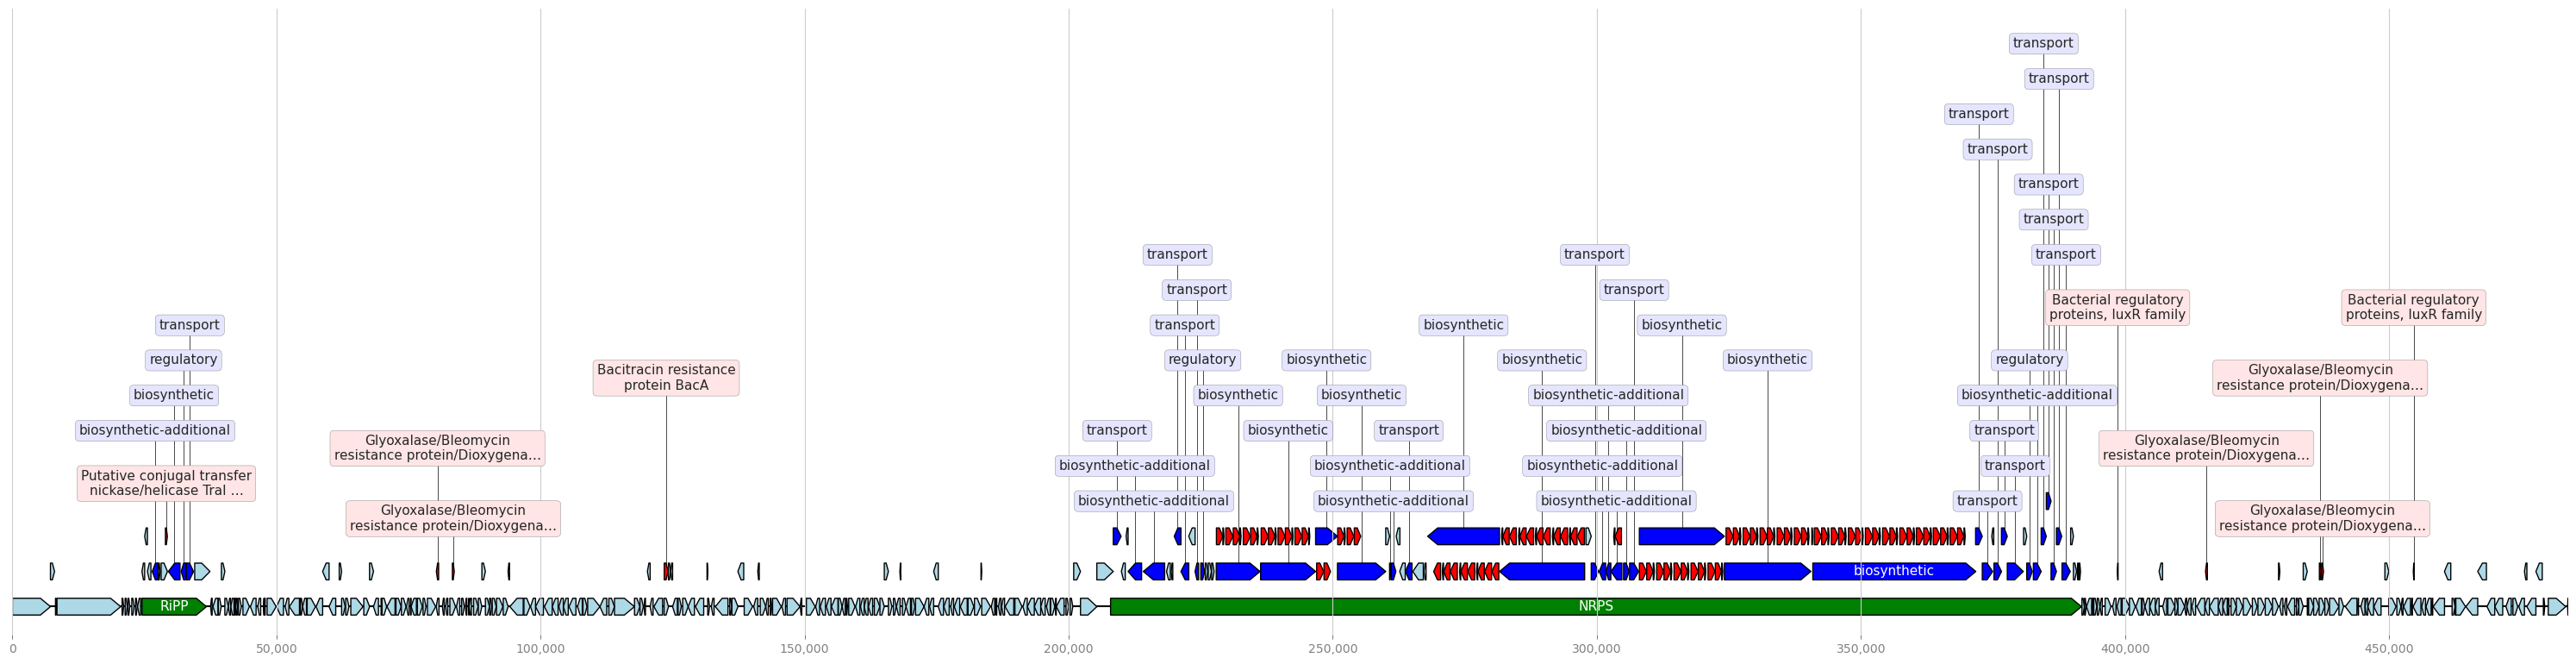

In [19]:
from dna_features_viewer import BiopythonTranslator

pfam_interest = [
    "AMP-binding",
    "TraI",
    "resistance",
    "Condensation domain",
    "luxR",
    "Beta lactam",
]

pfam_interest_smaller = ["luxR", "TraI", "Beta lactam", "resistance"]


class MyCustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        if feature.type == "CDS":
            if "gene_kind" in feature.qualifiers:
                return "blue"
            else:
                return "lightblue"
        elif feature.type == "protocluster":
            return "green"
        elif feature.type == "PFAM_domain" and any(
            i for i in pfam_interest if i in feature.qualifiers.get("description")[0]
        ):
            return "red"

    def compute_feature_label(self, feature):
        if feature.type == "CDS":
            if "gene_kind" in feature.qualifiers:
                return feature.qualifiers.get("gene_kind")[0]
            else:
                return None
        elif feature.type == "protocluster":
            return feature.qualifiers.get("category")[0]
        elif feature.type == "PFAM_domain":
            if any(
                i
                for i in pfam_interest_smaller
                if i in feature.qualifiers.get("description")[0]
            ):
                return feature.qualifiers.get("description")[0]
            else:
                return None

    def compute_filtered_features(self, features):
        return [
            feature
            for feature in features
            if (feature.type == "CDS")
            or (feature.type == "protocluster")
            or (
                "description" in feature.qualifiers
                and any(
                    i
                    for i in pfam_interest
                    if i in feature.qualifiers.get("description")[0]
                )
            )
        ]


graphic_record = MyCustomTranslator().translate_record("bgc_interest.gbk")
ax, _ = graphic_record.plot(figure_width=30)
ax.figure.tight_layout()